# Week 1

- website: https://janboone.github.io/msc_datascience/index.html
- github issues: https://github.com/janboone/msc_datascience/issues
- website screencasts: https://janboone.github.io/msc_datascience/pagescreencasts.html
- first lecture: https://janboone.github.io/msc_datascience/Introduction_Lecture.html#introduction
- assignment 1
  - github account
  - jupyterlab: clone repository with notebook
  - final assignment
- suggested workflow:
  - do the datacamp course in the schedule
  - do the relevant parts of the notebook =Statistical Hacking for Economists=
  - post questions that you have on github issues; we will address these in the lectures


## packages we will use

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons


# For the coming week

In [2]:
tf.random.uniform([10,3],0,1) # 10 rows, three columns, numbers between 0 and 1 (uniform distribution)

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0.5822197 , 0.5387424 , 0.26630318],
       [0.7744324 , 0.74681294, 0.19839299],
       [0.45301747, 0.35963297, 0.06712449],
       [0.33345103, 0.81565404, 0.9338734 ],
       [0.51966906, 0.2568339 , 0.5783384 ],
       [0.5477897 , 0.30830538, 0.22824752],
       [0.833635  , 0.5634277 , 0.54953635],
       [0.513134  , 0.84539366, 0.9968591 ],
       [0.57576406, 0.16925919, 0.24983215],
       [0.93242395, 0.26701474, 0.28105092]], dtype=float32)>

Tensor flow gives extra information, some packages will not be able to deal with that so we use numpy to solve it

In [3]:
tf.random.uniform([10,3],0,1).numpy()

array([[0.3398155 , 0.19376194, 0.8263606 ],
       [0.764362  , 0.06753254, 0.8809341 ],
       [0.09804225, 0.9361565 , 0.86302745],
       [0.14658463, 0.1929028 , 0.03766143],
       [0.7698417 , 0.9546851 , 0.85507524],
       [0.6324817 , 0.29380524, 0.8819288 ],
       [0.7913544 , 0.43267   , 0.8039664 ],
       [0.4956386 , 0.59418654, 0.4084586 ],
       [0.02316248, 0.5199573 , 0.48820138],
       [0.8889766 , 0.55235064, 0.18013608]], dtype=float32)

To plot random numbers we use the seaborn library 

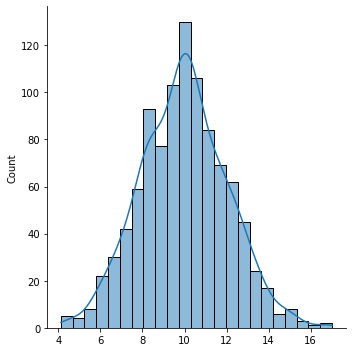

In [4]:
sn.displot(tf.random.normal([1000],10,2),kde=True);  # we simply draw 1000 numbers. We use the kernel density

Tensor flow wants lists, that's why we have the brackets. We cannot just give it a number, because the shape

In [5]:
tf.random.normal?

Signature:
tf.random.normal(
    shape,
    mean=0.0,
    stddev=1.0,
    dtype=tf.float32,
    seed=None,
    name=None,
)
Docstring:
Outputs random values from a normal distribution.

Example that generates a new set of random values every time:

>>> tf.random.set_seed(5);
>>> tf.random.normal([4], 0, 1, tf.float32)
<tf.Tensor: shape=(4,), dtype=float32, numpy=..., dtype=float32)>

Example that outputs a reproducible result:

>>> tf.random.set_seed(5);
>>> tf.random.normal([2,2], 0, 1, tf.float32, seed=1)
<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.3768897 , -0.01258316],
      [-0.169515   ,  1.0824056 ]], dtype=float32)>

In this case, we are setting both the global and operation-level seed to
ensure this result is reproducible.  See `tf.random.set_seed` for more
information.

Args:
  shape: A 1-D integer Tensor or Python array. The shape of the output tensor.
  mean: A Tensor or Python value of type `dtype`, broadcastable with `stddev`.
    The mean of the normal di

In [6]:
pm.Normal.dist(0,1).random(size=(10,3)) #first mean of the normal distribution, then std dev, random and specify the size

array([[ 0.90609473,  1.61021274, -0.76138941],
       [ 1.14647825,  0.25079754, -0.93771358],
       [ 0.55206273, -0.77842677, -0.84789581],
       [-1.47037317, -1.70797292,  0.62900713],
       [-2.32258143,  0.99738896,  0.95282367],
       [ 0.4410335 ,  0.53006234,  1.33354131],
       [-1.47601063, -0.00770151,  0.14826916],
       [ 0.5345377 ,  0.70909943,  1.24706867],
       [-0.30294137, -0.70238383,  1.19952675],
       [-0.48004673, -1.33250523,  1.63499171]])

In this case it doesn't need a list

In [7]:
np.random.normal(0,1,size=(10,3))

array([[ 0.79628663, -1.11471802,  1.04168139],
       [ 1.52428018, -0.83513784, -0.42471708],
       [-0.59221064,  0.45904794, -0.21720081],
       [ 0.94940076,  2.80823644, -0.26144845],
       [ 1.0909079 , -0.13381449,  0.91719975],
       [-0.80716507,  0.0554971 , -0.47825728],
       [ 0.44628944, -1.87232916, -0.45058256],
       [ 0.36780625, -0.44086309,  1.5542247 ],
       [-0.22499378,  0.47493031,  0.27027528],
       [-1.44329517, -1.16390986, -0.31111829]])

Now, we start building simple models with this random variables

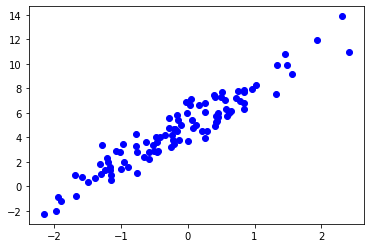

In [8]:
x = np.random.normal(0,1,size=(100,1))
y = 3*x + 5 + np.random.normal(0,1,size=(100,1))
plt.plot(x,y,'bo');

In [9]:
model = sm.OLS(y,sm.add_constant(x))
print("the fitted constant is {:.2f} and the fitted slope equals {:.2f}".format(*model.fit().params))

the fitted constant is 5.03 and the fitted slope equals 3.02


{} aloows you to introduce digits on your strings and format them

In [10]:
model.fit().params

array([5.03494922, 3.01732122])

you call the fit method for the model. And specify what I want to see are the parameters

In [11]:
print("{}".format(model.fit().params))

[5.03494922 3.01732122]


If I don't have the star, it will give us the list. If you add * it will split up the numbers

In [12]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     949.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.29e-52
Time:                        08:41:12   Log-Likelihood:                -132.70
No. Observations:                 100   AIC:                             269.4
Df Residuals:                      98   BIC:                             274.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0349      0.093     53.962      0.000       4.850       5.220
x1             3.0173      0.098     30.807      0.000       2.823       3.212
==============================================================================
Omnibus:                        3.885   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.875
Skew:                           0.271   Prob(JB):                        0.238
Kurtosis:                       2.370   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
def loss(beta):
    y_pred = beta[0] + beta[1]*x
    return np.sum((y-y_pred)**2)
optimize.minimize(loss,[0,0])

      fun: 83.19775819472221
 hess_inv: array([[0.00512735, 0.00084825],
       [0.00084825, 0.00564986]])
      jac: array([9.53674316e-07, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([5.03494921, 3.01732122])

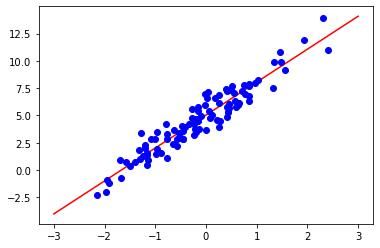

In [14]:
beta = optimize.minimize(loss,[0,0]).x
range_x = np.arange(-3,4)
plt.plot(range_x, [beta[0]+beta[1]*x for x in range_x],color='red')

plt.plot(x,y,'bo'); 

In [15]:
beta = optimize.minimize(loss,[0,0]).x
beta[0]

5.034949214660182

Increasing noise, by changing the std dev. If I increase the std dev in my error term, statistical significanc eof the coefficient decreases. 


Problem: give a sense of the uncertainty surounding the slope. How sensitive the slope is to my data. I want to have a distribution of slopes
- to do so, we use iteration and generate new data 
- we add x and y to the definition of loss

In [16]:
def loss(beta,x,y):
    y_pred = beta[0] + beta[1]*x
    return np.sum((y-y_pred)**2)
slopes = []
for i in np.arange(1000):
    x = np.random.normal(0,1,size=(100,1))
    y = 3*x + 5 + np.random.normal(10,5,size=(100,1))
    beta = optimize.minimize(lambda beta: loss(beta,x,y),[0,0]).x #lambda function is an annonymous function that tells python that when it comes across beta,x,y, it should think as a function of only beta). Starting point is 0,0. The x we use in '.x' has nothing to do with our data x.
#now, gather toghether all the slopes we have
    slopes.append(beta[1]) # if we were interested in constants, we would change it to beta[0]


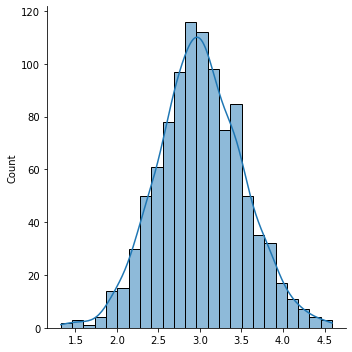

In [17]:
sn.displot(slopes,kde=True)

How likely is it that the slope is higher than 3.5?

In [18]:
np.sum(np.array(slopes)> 3.5)/len(slopes) #In each element of the array It will check wether slope is bigger than 3.5. Even if we know that len is 1000, it's better not to use the numebr because it limits replication

0.159